## Question: Whats the best basketball courts in Morristown NJ
### Name: Rishi Rana
### Date: 12/09/25
### Description: Finding the best basketball courts with positive reviews in Morristown NJ. The top 3 are: Elite Skills, Horseshoe Lake Park, and Turkey Brook Park.

#### Imports

In [1]:
import requests
import yelpkeys  # file where client_id and api_key is defined with user's private app information
from textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer
from __future__ import print_function
import argparse
import json
import pprint
import requests
import sys
import urllib
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from wordcloud import WordCloud
import matplotlib.pyplot as plt

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/rana.rishi/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


#### API Key

In [2]:
APIKEY = yelpkeys.api_key
headers = {'Authorization': 'Bearer %s' % yelpkeys.api_key,}

#### Define Functions for YELP and find basketball courts in Morristown NJ ---- Taken from example

In [3]:
# This client code can run on Python 2.x or 3.x.  Your imports can be
# simpler if you only need one of those.
try:
    # For Python 3.0 and later
    from urllib.error import HTTPError
    from urllib.parse import quote
    from urllib.parse import urlencode
except ImportError:
    # Fall back to Python 2's urllib2 and urllib
    from urllib2 import HTTPError
    from urllib import quote
    from urllib import urlencode


# Yelp Fusion no longer uses OAuth as of December 7, 2017.
# You no longer need to provide Client ID to fetch Data
# It now uses private keys to authenticate requests (API Key)
# You can find it on
# https://www.yelp.com/developers/v3/manage_app
API_KEY= yelpkeys.api_key


# API constants, you shouldn't have to change these.
API_HOST = 'https://api.yelp.com'
SEARCH_PATH = '/v3/businesses/search'
BUSINESS_PATH = '/v3/businesses/'  # Business ID will come after slash.


# Defaults for our simple example.
DEFAULT_TERM = 'Basketball'
DEFAULT_LOCATION = 'Morris County, NJ'
SEARCH_LIMIT = 20


def request(host, path, api_key, url_params=None):
    """Given your API_KEY, send a GET request to the API.
    Args:
        host (str): The domain host of the API.
        path (str): The path of the API after the domain.
        API_KEY (str): Your API Key.
        url_params (dict): An optional set of query parameters in the request.
    Returns:
        dict: The JSON response from the request.
    Raises:
        HTTPError: An error occurs from the HTTP request.
    """
    url_params = url_params or {}
    url = '{0}{1}'.format(host, quote(path.encode('utf8')))
    headers = {
        'Authorization': 'Bearer %s' % api_key,
    }

    print(u'Querying {0} ...'.format(url))

    response = requests.request('GET', url, headers=headers, params=url_params)

    return response.json()


def search(api_key, term, location):
    """Query the Search API by a search term and location.
    Args:
        term (str): The search term passed to the API.
        location (str): The search location passed to the API.
    Returns:
        dict: The JSON response from the request.
    """

    url_params = {
        'term': term.replace(' ', '+'),
        'location': location.replace(' ', '+'),
        'limit': SEARCH_LIMIT
    }
    return request(API_HOST, SEARCH_PATH, api_key, url_params=url_params)


def get_business(api_key, business_id):
    """Query the Business API by a business ID.
    Args:
        business_id (str): The ID of the business to query.
    Returns:
        dict: The JSON response from the request.
    """
    business_path = BUSINESS_PATH + business_id

    return request(API_HOST, business_path, api_key)


def query_api(term, location):
    """Queries the API by the input values from the user.
    Args:
        term (str): The search term to query.
        location (str): The location of the business to query.
    """
    response = search(API_KEY, term, location)

    businesses = response.get('businesses')

    if not businesses:
        print(u'No businesses for {0} in {1} found.'.format(term, location))
        return

    business_id = businesses[0]['id']

    print(u'{0} businesses found, querying business info ' \
        'for the top result "{1}" ...'.format(
            len(businesses), business_id))
    response = get_business(API_KEY, business_id)

    print(u'Result for business "{0}" found:'.format(business_id))
    pprint.pprint(response, indent=2)

#### Get the Response for Morris County NJ

In [4]:
response = search(API_KEY,DEFAULT_TERM, 'Morris County, NJ')

Querying https://api.yelp.com/v3/businesses/search ...


In [5]:
response

{'businesses': [{'id': 'b075tfHPcyZeP-xiafp1LQ',
   'alias': 'hoop-heaven-whippany',
   'name': 'Hoop Heaven',
   'image_url': 'https://s3-media0.fl.yelpcdn.com/bphoto/NYHg_UoYVj0841XZfw5Kug/o.jpg',
   'is_closed': False,
   'url': 'https://www.yelp.com/biz/hoop-heaven-whippany?adjust_creative=istl9jgw2i0Hp64EIdomvQ&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=istl9jgw2i0Hp64EIdomvQ',
   'review_count': 7,
   'categories': [{'alias': 'basketballcourts', 'title': 'Basketball Courts'}],
   'rating': 2.4,
   'coordinates': {'latitude': 40.824134, 'longitude': -74.394714},
   'transactions': [],
   'location': {'address1': '125 Algonquin Pkwy',
    'address2': '',
    'address3': '',
    'city': 'Whippany',
    'zip_code': '07981',
    'country': 'US',
    'state': 'NJ',
    'display_address': ['125 Algonquin Pkwy', 'Whippany, NJ 07981']},
   'phone': '+19738844667',
   'display_phone': '(973) 884-4667',
   'distance': 16158.35161745851},
  {'id': '_7sgI88OWqFnIUzi

#### Get the sentiment values for each review and print out the reviews ---- taken from example

In [6]:
positive_count = 0
negative_count = 0
neutral_count = 0

for business in response['businesses']:
    #print(response)
    print('Business Name: ' + business['name'])
    print('Rating: ' + str(business['rating']))
    print('Review Count: ' + str(business['review_count']))
    print('Reviews: ')
    BUS_REVIEW='/v3/businesses/{}/reviews'.format(business['id'])
    #print('https://api.yelp.com/v3/businesses/{}/reviews?limit=20&sort_by=yelp_sort'.format(business['id']))
    reviews = request(API_HOST,BUS_REVIEW, API_KEY)
    
    # Safely loop even if 'reviews' key is missing
    for review in reviews.get('reviews', []):
        print(' - ' + review['text'])
        # Perform sentiment analysis on the review using TextBlob
        blob = TextBlob(review['text'])
        sentiment = blob.sentiment.polarity
        if sentiment > 0:
            print('    Sentiment: Positive')
            positive_count += 1
        elif sentiment < 0:
            print('    Sentiment: Negative')
            negative_count += 1
        else:
            print('    Sentiment: Neutral')
            neutral_count += 1
        print('\n================\n\n\n')

Business Name: Hoop Heaven
Rating: 2.4
Review Count: 7
Reviews: 
Querying https://api.yelp.com/v3/businesses/b075tfHPcyZeP-xiafp1LQ/reviews ...
 - I been going to Hoop Heaven for about 10 years now and it's an amazing place.
     There coworkers are really nice and care about things that should be...
    Sentiment: Positive




 - Although the courts are nice, they charge parents $9.00 to get in. It was $5.00 last season. What a hustle! Doesn't anyone complain anymore? I understand it...
    Sentiment: Positive




 - No doubt it is a money making haven. It's bad enough to run crappy tournaments (which are really just a couple of games) each weekend but overcharging...
    Sentiment: Negative




Business Name: Morris Plains Community Center
Rating: 5.0
Review Count: 1
Reviews: 
Querying https://api.yelp.com/v3/businesses/_7sgI88OWqFnIUzisRGAIw/reviews ...
 - Came Here To Vote.  Stayed Here to Play

  We came here to participate in the 2016 Primary Elections.  The Hall was large and pr

### Simple code for creating a donut chart (courtesy of chatGPT) ---- taken from example

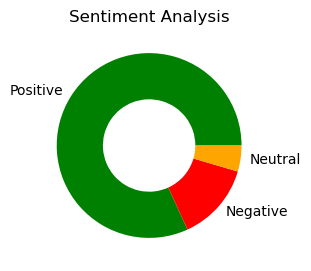

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define data
pos = positive_count
neg = negative_count
neu = neutral_count
labels = ['Positive', 'Negative', "Neutral"]
values = [pos, neg, neu]

# Create donut chart
fig, ax = plt.subplots(figsize=(3, 3))
ax.pie(values, labels=labels, wedgeprops=dict(width=0.5), colors=['green', 'red', 'orange'])
ax.set_title('Sentiment Analysis')

plt.show()

#### Get the sentiment values for each review and print out the reviews (NaiveBayesAnaylzer) (using previous code)

In [8]:
positive_count = 0
negative_count = 0

for business in response['businesses']:
    print('Business Name: ' + business['name'])
    print('Rating: ' + str(business['rating']))
    print('Review Count: ' + str(business['review_count']))
    print('Reviews: ')
    BUS_REVIEW='/v3/businesses/{}/reviews'.format(business['id'])
    reviews = request(API_HOST, BUS_REVIEW, API_KEY)

    for review in reviews.get('reviews', []):
        print(' - ' + review['text'])

        blob = TextBlob(review['text'], analyzer=NaiveBayesAnalyzer())
        sentiment = blob.sentiment.classification

        if sentiment == 'pos':
            print('    Sentiment: Positive')
            positive_count += 1
        elif sentiment == 'neg':
            print('    Sentiment: Negative')
            negative_count += 1

        print('\n================\n\n\n')

Business Name: Hoop Heaven
Rating: 2.4
Review Count: 7
Reviews: 
Querying https://api.yelp.com/v3/businesses/b075tfHPcyZeP-xiafp1LQ/reviews ...
 - I been going to Hoop Heaven for about 10 years now and it's an amazing place.
     There coworkers are really nice and care about things that should be...
    Sentiment: Negative




 - Although the courts are nice, they charge parents $9.00 to get in. It was $5.00 last season. What a hustle! Doesn't anyone complain anymore? I understand it...
    Sentiment: Positive




 - No doubt it is a money making haven. It's bad enough to run crappy tournaments (which are really just a couple of games) each weekend but overcharging...
    Sentiment: Negative




Business Name: Morris Plains Community Center
Rating: 5.0
Review Count: 1
Reviews: 
Querying https://api.yelp.com/v3/businesses/_7sgI88OWqFnIUzisRGAIw/reviews ...
 - Came Here To Vote.  Stayed Here to Play

  We came here to participate in the 2016 Primary Elections.  The Hall was large and pr

### Simple code for creating a donut chart (courtesy of chatGPT) 

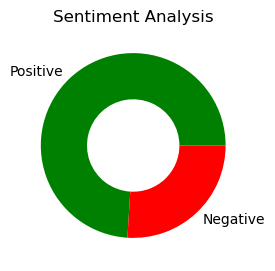

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define data
pos = positive_count
neg = negative_count
labels = ['Positive', 'Negative']
values = [pos, neg]

# Create donut chart
fig, ax = plt.subplots(figsize=(3, 3))
ax.pie(values, labels=labels, wedgeprops=dict(width=0.5), colors=['green', 'red'])
ax.set_title('Sentiment Analysis')

plt.show()

#### Delete the stop words from the reviews

In [10]:
# Function to remove any stop words from reviews
def remove_stopwords(text):
    words = text.split()
    filtered_words = [w for w in words if w.lower() not in stop_words]
    return " ".join(filtered_words)

#### Take Previous code and just clean text using stopwords and also use the cleaned reviews and append clean text

In [11]:
all_cleaned_reviews = []
stop_words = set(stopwords.words('english'))

for business in response['businesses']:
    print('Business Name: ' + business['name'])
    print('Rating: ' + str(business['rating']))
    print('Review Count: ' + str(business['review_count']))
    print('Reviews: ')
    BUS_REVIEW='/v3/businesses/{}/reviews'.format(business['id'])
    reviews = request(API_HOST, BUS_REVIEW, API_KEY)

    # Safely loop even if 'reviews' key is missing
    for review in reviews.get('reviews', []):
        # Remove stopwords
        cleaned_text = remove_stopwords(review['text'])
        # Append clean text to this variable
        all_cleaned_reviews.append(cleaned_text)

        print(' - ' + cleaned_text)

        print('\n================\n\n\n')

Business Name: Hoop Heaven
Rating: 2.4
Review Count: 7
Reviews: 
Querying https://api.yelp.com/v3/businesses/b075tfHPcyZeP-xiafp1LQ/reviews ...
 - going Hoop Heaven 10 years amazing place. coworkers really nice care things be...




 - Although courts nice, charge parents $9.00 get in. $5.00 last season. hustle! anyone complain anymore? understand it...




 - doubt money making haven. bad enough run crappy tournaments (which really couple games) weekend overcharging...




Business Name: Morris Plains Community Center
Rating: 5.0
Review Count: 1
Reviews: 
Querying https://api.yelp.com/v3/businesses/_7sgI88OWqFnIUzisRGAIw/reviews ...
 - Came Vote. Stayed Play came participate 2016 Primary Elections. Hall large provided comfortable voting...




Business Name: Speedwell Park
Rating: 4.4
Review Count: 8
Reviews: 
Querying https://api.yelp.com/v3/businesses/MngdKuzMBkP6dkcF9P8LDA/reviews ...
 - Beautiful park visit year long! Amazing views! park includes damn water fall walking trails alo

#### Create the wordcloud

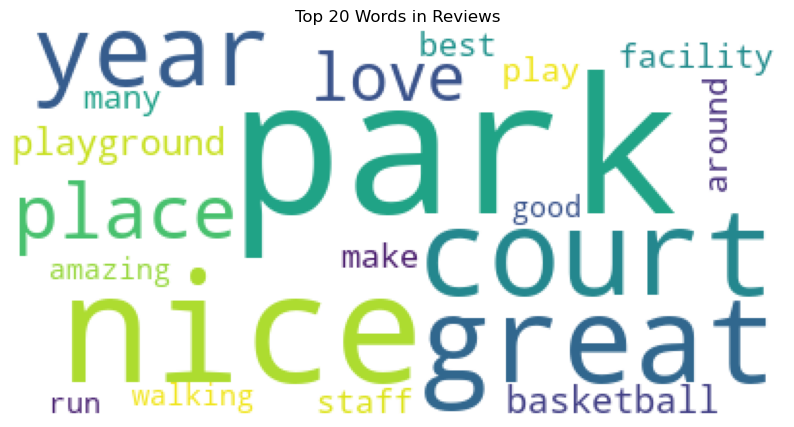

In [12]:
# Join everything
text_for_wordcloud = " ".join(all_cleaned_reviews)

# Create a wordcloud for everything joined 20 words
wordcloud = WordCloud(max_words=20, background_color="white").generate(text_for_wordcloud)

#Plot
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud)
plt.axis("off")
plt.title("Top 20 Words in Reviews")
plt.show()

# CONCLUSION: 

#### The top 3 are: Elite Skills, Horseshoe Lake Park, and Turkey Brook Park.

#### I found many places with great views and basketball courts. Using the TextBlob, there were more accurate results with the postive, negative, and neutral reviews. The NaiveBayesAnaylzer was less accurate since it couldnt see the neutral statemnets. Cleaning up the reviews was somewhat good. Although it made senteces sort of confusing, you can interpret the meaning and whatever the reviewer was trying to say. The Wordcloud summed up the results of this project by showing mostly positive words about thesre basketball courts in Morristown. This supports the high percentage of positive reviews compared to the negative and neutral